In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from tqdm import tqdm


from full_dynamics import FullSimulation

(see figure 8)

In [2]:
PW_history = np.load('data/PW_history.npy')
FW_history = np.load('data/FW_history.npy')

/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_98722/2715131522.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


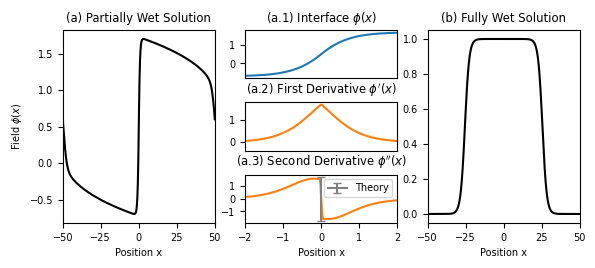

In [3]:
import numpy as np
import matplotlib.pyplot as plt

PW_history = np.load('data/PW_history.npy')
FW_history = np.load('data/FW_history.npy')

# Sample data
x = np.linspace(-50, 50, 5001)
dx = 100/5000
phi = np.flip(PW_history[-1])
phi_prime = np.gradient(phi, dx)
phi_double_prime = np.gradient(phi_prime, dx)

# Create figure and gridspec layout
fig = plt.figure(figsize=(6.67, 2.5))
plt.rcParams.update({'font.size': 7})
gs = fig.add_gridspec(3, 3, width_ratios=[1, 1, 1], hspace=0.5)

# Left: main plot (spans all 3 rows)
ax_main = fig.add_subplot(gs[:, 0])
ax_main.plot(x, phi, label='Main Plot', color='black')
ax_main.set_title("(a) Partially Wet Solution")
ax_main.set_xlabel("Position x")
ax_main.set_ylabel(r"Field $\phi(x)$")
ax_main.set_xlim(-50, 50)
ax_main.set_xticks([-50, -25, 0, 25, 50])

# Right: main plot (spans all 3 rows)
ax_main = fig.add_subplot(gs[:, 2])
ax_main.plot(x, FW_history[-1], label='Main Plot', color='black')
ax_main.set_xlabel("Position x")
ax_main.set_title("(b) Fully Wet Solution")
ax_main.set_xlim(-50, 50)
ax_main.set_xticks([-50, -25, 0, 25, 50])
#ax_main.set_ylabel(r"$\phi(x)$")

# Right: 3 stacked plots
ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(x, phi, color='tab:blue')
ax1.set_xlim(-2, 2)
ax1.set_title(r'(a.1) Interface $\phi(x)$')
ax1.set_xticks([])

ax2 = fig.add_subplot(gs[1, 1])
ax2.plot(x, phi_prime, color='tab:orange')
ax2.set_title(r'(a.2) First Derivative $\phi^{ \prime}(x)$')
ax2.set_xticks([])
ax2.set_xlim(-2, 2)


ax3 = fig.add_subplot(gs[2, 1])
jump_theory = 2 * phi_prime[2500]
#ax3.vlines(0, -jump_theory/2, jump_theory/2, color='grey')

ax3.plot(x, phi_double_prime, color='tab:orange')
ax3.set_title(r'(a.3) Second Derivative $\phi^{\prime \prime}(x)$')
ax3.set_xlabel("Position x")
ax3.set_xlim(-2, 2)
ax3.errorbar(0, 0, yerr=jump_theory/2, color='grey', label='Theory', capsize=3)

ax3.legend(loc='upper right')


# Adjust layout
plt.tight_layout()
#plt.savefig('Fig_PW_FW_solns.pdf', bbox_inches='tight')
plt.show()